In [1]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
import torch

2021-08-04 09:00:42,713- WARNING•	QuickBB solver is unavailable
2021-08-04 09:00:42,715- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


In [2]:
file3 = open("20NodeRandomGraphs.txt")
mat_list = np.loadtxt(file3).reshape(55,20,20)
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list
g_list = mats_to_graphs(mat_list)
graphs = g_list

In [3]:
file5 = open("New20NodeRandomGraphs.txt")
mat_list = np.loadtxt(file5).reshape(55,20,20)
g_list_more = mats_to_graphs(mat_list)
for i in g_list_more:
    g_list.append(i)

In [4]:
file1 = open("T1_Averaging_110_20NodeGraphs_Subset2.txt")
results  = np.loadtxt(file1).reshape(4,1100)
a = results[2]

In [5]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes

ev_deg_dict ={}
n = len(graphs)
for i in range(n):
  ev_deg_dict[i] = even_percent(graphs[i])

In [6]:
ev_deg_dict

{0: 0.0,
 1: 0.0,
 2: 0.1,
 3: 0.1,
 4: 0.2,
 5: 0.2,
 6: 0.3,
 7: 0.3,
 8: 0.4,
 9: 0.4,
 10: 0.5,
 11: 0.5,
 12: 0.6,
 13: 0.6,
 14: 0.7,
 15: 0.7,
 16: 0.8,
 17: 0.8,
 18: 0.9,
 19: 0.9,
 20: 1.0,
 21: 1.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.1,
 26: 0.1,
 27: 0.1,
 28: 0.6,
 29: 0.6,
 30: 0.6,
 31: 0.7,
 32: 0.7,
 33: 0.7,
 34: 0.2,
 35: 0.2,
 36: 0.2,
 37: 0.3,
 38: 0.3,
 39: 0.3,
 40: 0.4,
 41: 0.4,
 42: 0.4,
 43: 0.5,
 44: 0.5,
 45: 0.5,
 46: 0.8,
 47: 0.8,
 48: 0.8,
 49: 0.9,
 50: 0.9,
 51: 0.9,
 52: 1.0,
 53: 1.0,
 54: 1.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.1,
 61: 0.1,
 62: 0.1,
 63: 0.1,
 64: 0.1,
 65: 0.2,
 66: 0.2,
 67: 0.2,
 68: 0.2,
 69: 0.2,
 70: 0.3,
 71: 0.3,
 72: 0.3,
 73: 0.3,
 74: 0.3,
 75: 0.4,
 76: 0.4,
 77: 0.4,
 78: 0.4,
 79: 0.4,
 80: 0.5,
 81: 0.5,
 82: 0.5,
 83: 0.5,
 84: 0.5,
 85: 0.6,
 86: 0.6,
 87: 0.6,
 88: 0.6,
 89: 0.6,
 90: 0.7,
 91: 0.7,
 92: 0.7,
 93: 0.7,
 94: 0.7,
 95: 0.8,
 96: 0.8,
 97: 0.8,
 98: 0.8,
 99: 0.8,
 100: 0.9,

In [9]:
len(graphs)

110

In [10]:
x = []
y = []
c = []
for i in range(len(a)):
    x.append(0.5)
    y.append(ev_deg_dict[i%110])
    c.append(a[i])

In [11]:
new_x = [0.5]
new_y = [0.0+(i/10) for i in range(11)]

In [12]:
def find_av_all(x, y, c, targx, targy):
    s = 0
    t=0
    for i  in range(len(x)):
        x_ = x[i]
        for j in range(len(y)):
            y_ = y[j]
            if (x_ == targx) and (y_ == targy) and (i==j):
                s+= c[i]
                t+=1
    if t ==0:
        return 0
    return s/t
            

In [13]:
#new_c = []
data = np.zeros((11,1))
for x_ in new_x:
    for y_ in new_y:
        c_ = find_av_all(x, y, c, x_, y_)
        idxx = 0
        idxy = 11-int(y_*10)-1
        data[idxy, idxx] = c_
        #new_c.append(c_)

In [14]:
data

array([[0.94463651],
       [0.94015416],
       [0.93356256],
       [0.92800877],
       [0.92742567],
       [0.92300832],
       [0.90722283],
       [0.90874242],
       [0.89746028],
       [0.88357722],
       [0.87488637]])

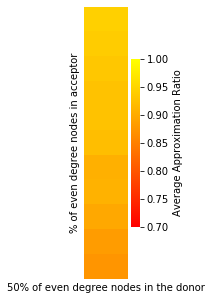

In [16]:
df = DataFrame(data)  #, index=Index, columns=Cols)
# plt.vlines(grid_lines, 0, n)
# plt.hlines(grid_lines, 0, n)
fig = plt.figure(figsize=(1,5))
ax = sns.heatmap(df, annot=False, cmap="autumn", vmin = 0.7, vmax = 1,xticklabels=False, yticklabels=False, cbar_kws={'label': 'Average Approximation Ratio'})
plt.xlabel("50% of even degree nodes in the donor")
plt.ylabel("% of even degree nodes in acceptor")
#ax.tick_params(left=False, bottom=False) 
plt.show()

In [23]:
data

array([[0.75638793, 0.77657018, 0.78109675, 0.81695627, 0.83943005,
        0.88779458, 0.88950553, 0.92479233, 0.94891582, 0.97474733,
        0.99986251],
       [0.83862998, 0.85187754, 0.85824115, 0.88034776, 0.89494578,
        0.92383466, 0.92773685, 0.94896023, 0.96645098, 0.98372641,
        0.99931089],
       [0.76532323, 0.784847  , 0.78915637, 0.82383109, 0.84565493,
        0.89235396, 0.89390691, 0.92778904, 0.95089082, 0.97523319,
        0.99948851],
       [0.81943964, 0.83448998, 0.83574284, 0.862911  , 0.87959119,
        0.91684697, 0.91669444, 0.94376212, 0.96026796, 0.97797917,
        0.99799251],
       [0.99653647, 0.99696377, 0.99982447, 0.99948035, 0.99957027,
        0.99766529, 0.9999644 , 0.998918  , 0.99968642, 0.99811618,
        0.99956567],
       [0.89469728, 0.89457349, 0.88377705, 0.88732138, 0.88497265,
        0.90137162, 0.88238437, 0.89187764, 0.8810555 , 0.86580866,
        0.87697301],
       [0.99767089, 0.98528727, 0.97686169, 0.96283627, 0.

In [32]:
for i in range(len(x)):
    if x[i] == 0.4:
        print(c[i])
        print(y[i])
        print('#########')

0.9996650350466691
0.0
#########
0.9995198561303965
0.0
#########
0.9977225318096711
0.1
#########
0.998258812093345
0.1
#########
0.99957733444742
0.2
#########
0.9995701931104755
0.2
#########
0.9995948363621091
0.3
#########
0.999535655327397
0.3
#########
0.9999982356163757
0.4
#########
0.9998835954428451
0.4
#########
0.9980284614940343
0.5
#########
0.9981837569140953
0.5
#########
0.9999248354489485
0.6
#########
0.999707460794178
0.6
#########
0.9989469337140843
0.7
#########
0.9995073670518135
0.7
#########
0.999396019128765
0.8
#########
0.9998706919957794
0.8
#########
0.9950651691422934
0.9
#########
0.9976398888585585
0.9
#########
0.9965982020442532
1.0
#########
0.9967961558485087
1.0
#########
0.9994928792140163
0.0
#########
0.9995333387802476
0.0
#########
0.9995985134187991
0.0
#########
0.9982965170547861
0.1
#########
0.9982245949197299
0.1
#########
0.9979508682551679
0.1
#########
0.9998307661473593
0.6
#########
0.9983506618220958
0.6
#########
0.99990866045706

In [33]:
ev_deg_dict

{0: 0.0,
 1: 0.0,
 2: 0.1,
 3: 0.1,
 4: 0.2,
 5: 0.2,
 6: 0.3,
 7: 0.3,
 8: 0.4,
 9: 0.4,
 10: 0.5,
 11: 0.5,
 12: 0.6,
 13: 0.6,
 14: 0.7,
 15: 0.7,
 16: 0.8,
 17: 0.8,
 18: 0.9,
 19: 0.9,
 20: 1.0,
 21: 1.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.1,
 26: 0.1,
 27: 0.1,
 28: 0.6,
 29: 0.6,
 30: 0.6,
 31: 0.7,
 32: 0.7,
 33: 0.7,
 34: 0.2,
 35: 0.2,
 36: 0.2,
 37: 0.3,
 38: 0.3,
 39: 0.3,
 40: 0.4,
 41: 0.4,
 42: 0.4,
 43: 0.5,
 44: 0.5,
 45: 0.5,
 46: 0.8,
 47: 0.8,
 48: 0.8,
 49: 0.9,
 50: 0.9,
 51: 0.9,
 52: 1.0,
 53: 1.0,
 54: 1.0}